In [57]:
# libraries for data analysis and feature engineering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')

# libraries for test/train split
from sklearn.model_selection import train_test_split

#libraries for building the ML model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#polynomial model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_boston
data = load_boston()

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# Returns the description of the dataset
print(data.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
 # Returns the features values of the dataset
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
 # Returns the target values of the dataset
targets = data.target
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
 #Returns the feature_names of the data
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#I used the pandas dataframe to read the data and set the column name to be the value of the feature_names
boston_df = pd.DataFrame(data.data, columns=data.feature_names)



In [10]:
#Getting the first 5 rows of the dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# according to the description, the 14th feature MEDV is the target but it is not in the dataframe
# I'll add it to the dataframe
boston_df['MEDV'] = targets

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


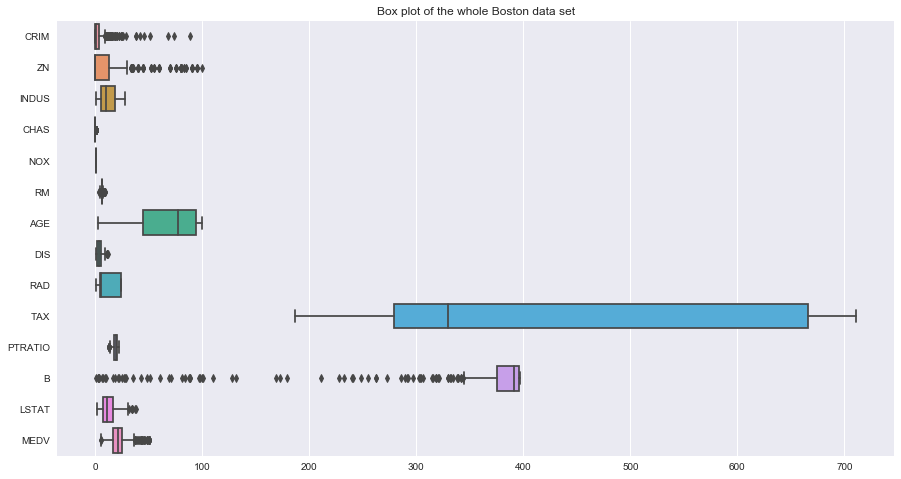

In [14]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = boston_df, orient = 'h')
plt.title('Box plot of the whole Boston data set')
plt.show()

In [15]:
missing = boston_df.isnull()
for col in missing.columns.values.tolist():
    print( '*'*30)
    print(col)
    print(missing[col].value_counts())
    print('*'*30)

******************************
CRIM
False    506
Name: CRIM, dtype: int64
******************************
******************************
ZN
False    506
Name: ZN, dtype: int64
******************************
******************************
INDUS
False    506
Name: INDUS, dtype: int64
******************************
******************************
CHAS
False    506
Name: CHAS, dtype: int64
******************************
******************************
NOX
False    506
Name: NOX, dtype: int64
******************************
******************************
RM
False    506
Name: RM, dtype: int64
******************************
******************************
AGE
False    506
Name: AGE, dtype: int64
******************************
******************************
DIS
False    506
Name: DIS, dtype: int64
******************************
******************************
RAD
False    506
Name: RAD, dtype: int64
******************************
******************************
TAX
False    506
Name: TAX, dtype: int

<h3>Selecting my features</h3>

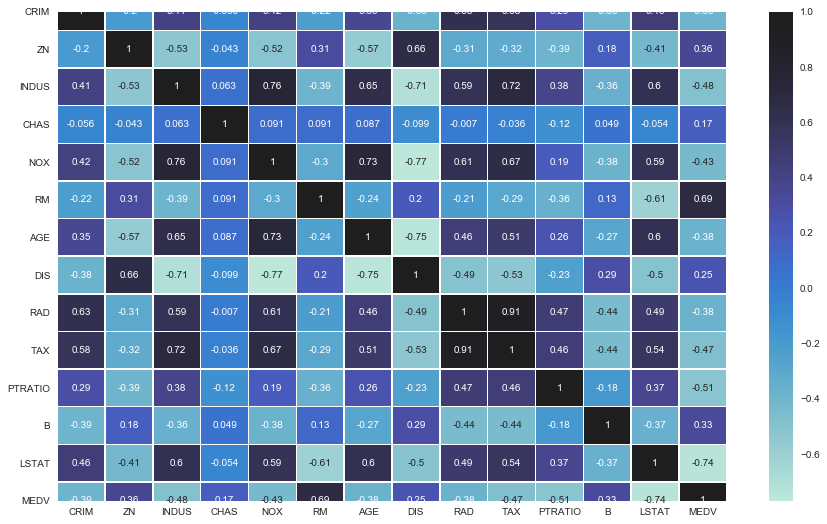

In [16]:
plt.figure(figsize = (15, 9))
sns.heatmap(data = boston_df.corr().round(3), annot = True,  linewidths=.5,  center = 1)
plt.show()


RM, LSTAT correlates possitively and negatively respectively with our target variable.
Others have small correlations

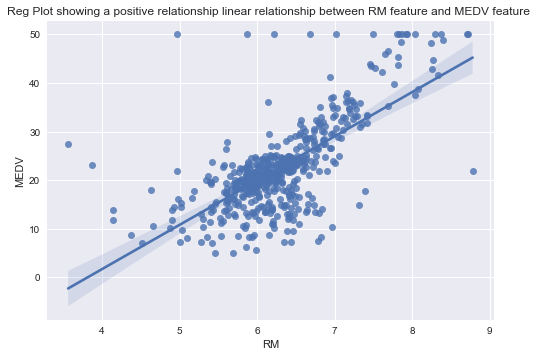

In [17]:
sns.regplot(x = boston_df['RM'], y = boston_df['MEDV']) 
plt.title('Reg Plot showing a positive relationship linear relationship between RM feature and MEDV feature ')
plt.show()

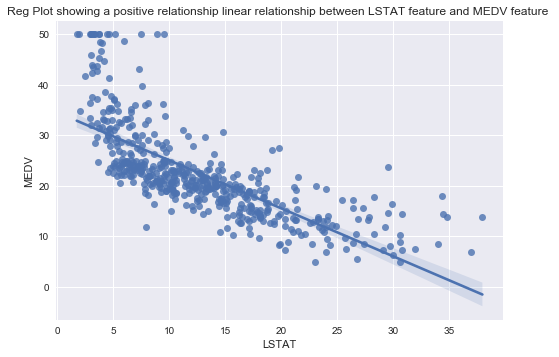

In [18]:
sns.regplot(x = boston_df['LSTAT'], y = boston_df['MEDV'])
plt.title('Reg Plot showing a positive relationship linear relationship between LSTAT feature and MEDV feature ')
plt.show()

This would be the features I would be using for my linear regression model

In [19]:
features = boston_df[['LSTAT', 'RM']]
features

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [20]:
target = boston_df['MEDV']
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

<h4>Test Train Split</h4>

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.25, random_state=5)

<h4>Creating my linear regression model</h4>

In [22]:
reg = LinearRegression()


In [23]:
reg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
coefficient = reg.coef_
intercept = reg.intercept_
print (f'Coefficients: {coefficient} ')
print (f'Intercept: {intercept} ')

Coefficients: [-0.67758923  4.91580979] 
Intercept: 0.18582215623609244 


In [25]:
print(f'Coefficient of the LSTAT feature is {coefficient[0]}')
print(f'Coefficient of the RM feature is {coefficient[1]}')
print(f'The intercept is {intercept}')

Coefficient of the LSTAT feature is -0.6775892259239787
Coefficient of the RM feature is 4.9158097879940605
The intercept is 0.18582215623609244


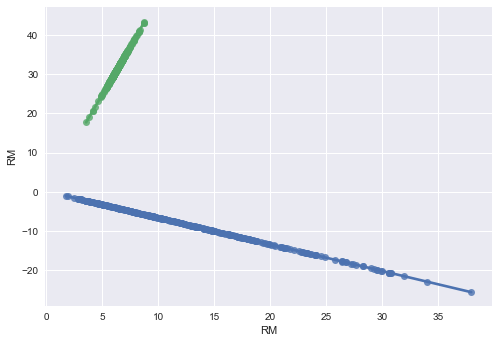

In [26]:
# sns.scatterplot(x = X_train.RM, y = Y_train)
# sns.scatterplot(x = X_train.LSTAT, y = Y_train)
sns.regplot(X_train.LSTAT, coefficient[0]*X_train.LSTAT + intercept)
sns.regplot(X_train.RM, coefficient[1]*X_train.RM + intercept)
plt.show()

In [27]:
predict = reg.predict(X_test)
predict

array([37.58807857, 29.59297169, 25.76101249,  0.74300759, 33.53477813,
        8.20830029, 30.656908  , 27.79496552, 26.31117835, 22.09870848,
       32.44719024, 23.00722468, 22.78747363, 31.06092845, 27.08762183,
       20.59421279, -0.35255184, 17.75247333, 12.35780068, 21.63571203,
        5.11119318, 23.97456993, 38.01468647, 24.53869584, 29.71000651,
       12.84312497, 26.87398738, 22.38768913, 27.38536997, 28.8069699 ,
       11.75526204, 10.5582026 , 18.04661053, 25.18556028, 26.23930814,
       22.97599097, 26.31835565, 12.64303545, 37.46424043, 33.37284344,
       20.35040362,  1.54242622, 27.56897322, 16.68173026, 27.37207608,
       29.84938461, -2.65688299, 17.33978948, 20.72640159, 14.16547609,
       20.75775653, 21.4223269 , 25.0289548 , 16.37043377, 17.55104636,
       27.6537462 , 36.20846116, 19.97678836, 28.76511547, 20.38522083,
       20.10355414, 22.92857001, 16.52376849, 31.20615497, 22.52626441,
       13.08454972, 23.44086464, 25.67665291, 22.79438275, 21.45

In [28]:
mae = mean_absolute_error(predict, Y_test)
mse = np.sqrt(mean_squared_error(predict, Y_test))
r2 = r2_score(Y_test, predict)

In [29]:
print(f"Mean absolute error: {round(mae, 3)}")
print(f"Mean squared error (MSE):  {round(mse, 3)}" )
print(f"R2-score: {round(r2, 3)}")

Mean absolute error: 3.872
Mean squared error (MSE):  5.531
R2-score: 0.629


<h3>Kaggle dataset</h3>

In [33]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [34]:
test.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [35]:
train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [36]:
targ = train.SalePrice
targ

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [37]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [38]:
train.Id.dtype

dtype('int64')

<h3>FEATURE SELECTION</h3>
<h6>Selecting Numerical data set to analyze and select the best features</h6>

In [39]:
num  = [] #numerical columns
cat = [] #categorical columns
for col in train.columns.values.tolist():
    if train[col].dtype != 'object':
        num.append(col)
    else:
        cat.append(col)

print(f"Numerical columns are {num}")
print(f"\n\nCategorical columns are {cat}")


Numerical columns are ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Categorical columns are ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'F

In [40]:
#Dropping the categorical columns to deal with only numerical columns
#Dropping the ID column as it we do not need it in our analysis
num_df = train.drop(columns = cat)
num_df = num_df.drop(columns = 'Id')
num_df.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000


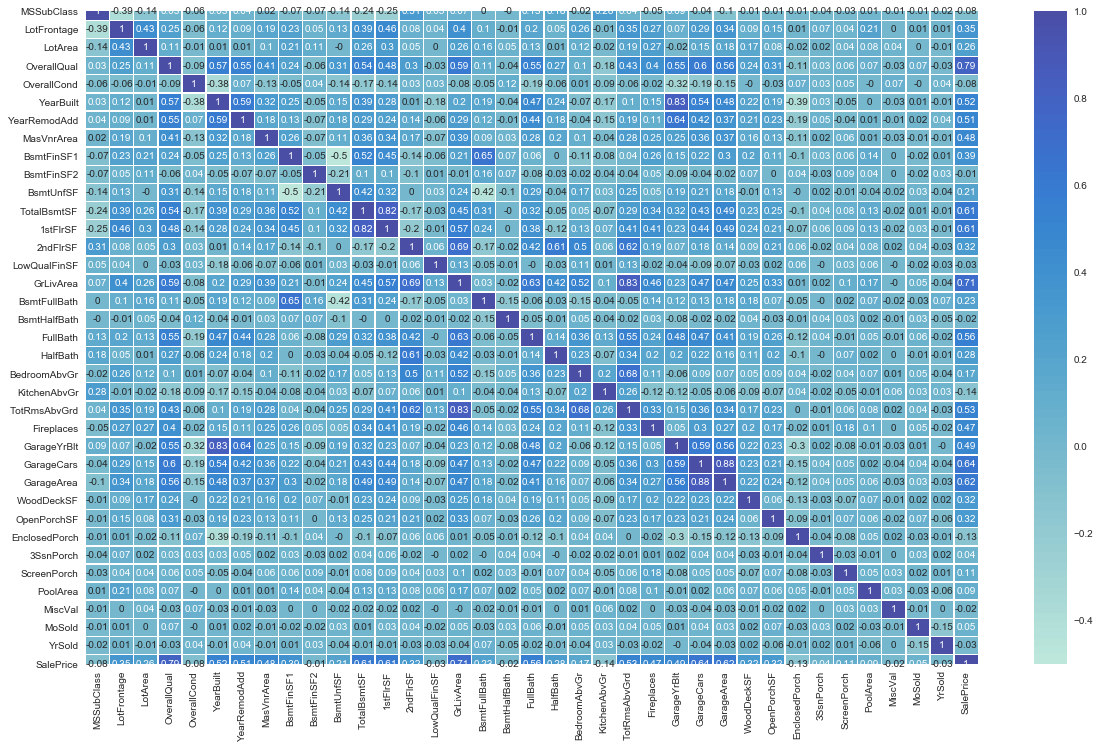

In [41]:
plt.figure(figsize = (20, 12))
sns.heatmap(data = num_df.corr().round(2), annot = True,  linewidths=.5,  center = 2)
plt.show()

From the above plot, we discover that OverallQual, YearBuilt, YearRemodAdd,  TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea all have a positive linear correlation of above 0.5 with the SalePrice. While OverallQual have the highest linear relationship with 0.79 

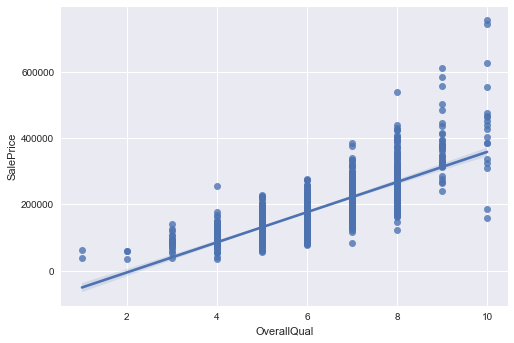

In [42]:
#Plotting the relationships sns.regplot
sns.regplot(x = num_df['OverallQual'], y = num_df['SalePrice'])

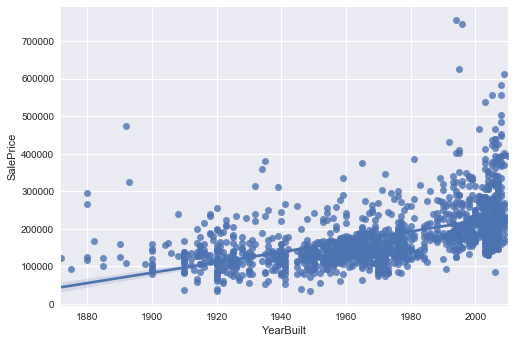

In [43]:
sns.regplot(x = num_df['YearBuilt'], y = num_df['SalePrice'])

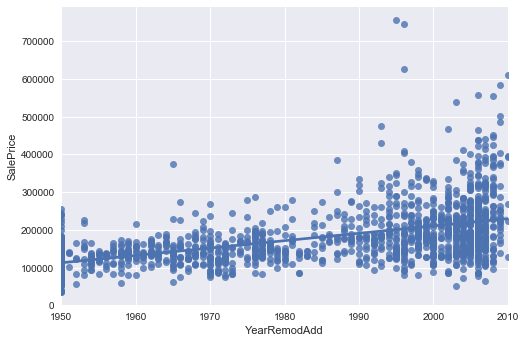

In [44]:
sns.regplot(x = num_df['YearRemodAdd'], y = num_df['SalePrice'])

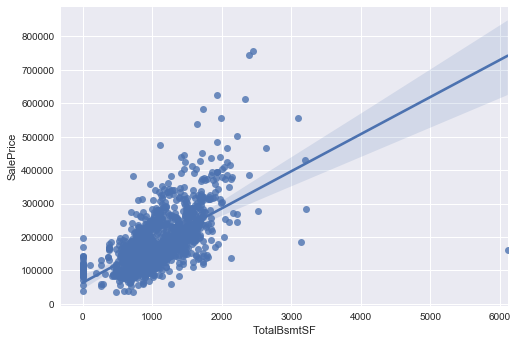

In [45]:
sns.regplot(x = num_df['TotalBsmtSF'], y = num_df['SalePrice'])

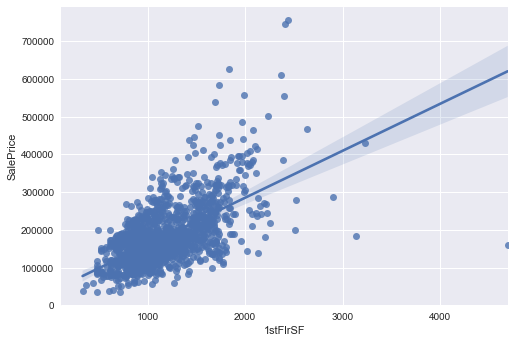

In [46]:
sns.regplot(x = num_df['1stFlrSF'], y = num_df['SalePrice'])

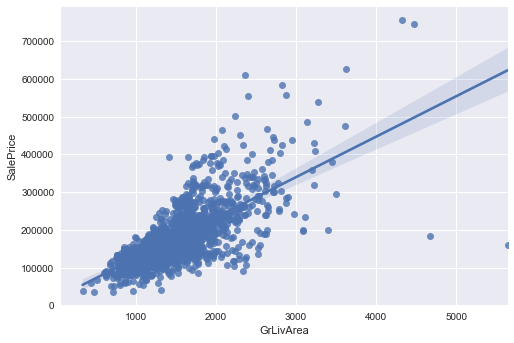

In [47]:
sns.regplot(x = num_df['GrLivArea'], y = num_df['SalePrice'])

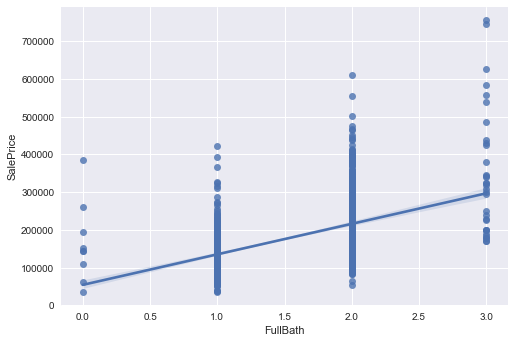

In [48]:
sns.regplot(x = num_df['FullBath'], y = num_df['SalePrice'])

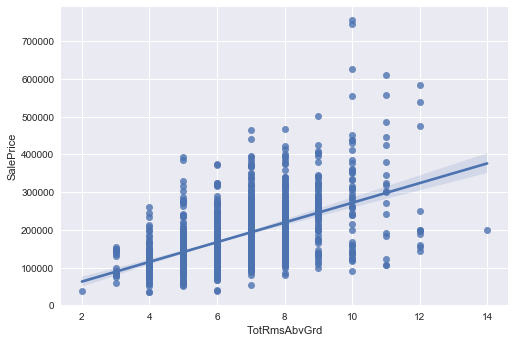

In [49]:
sns.regplot(x = num_df['TotRmsAbvGrd'], y = num_df['SalePrice'])

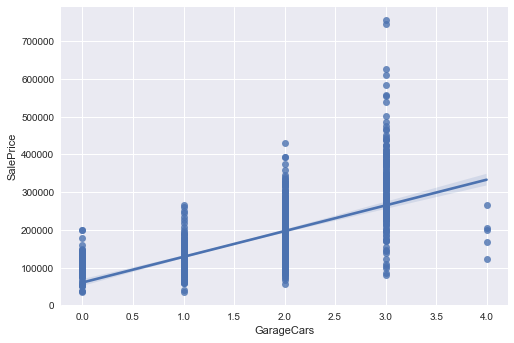

In [50]:
sns.regplot(x = num_df['GarageCars'], y = num_df['SalePrice'])

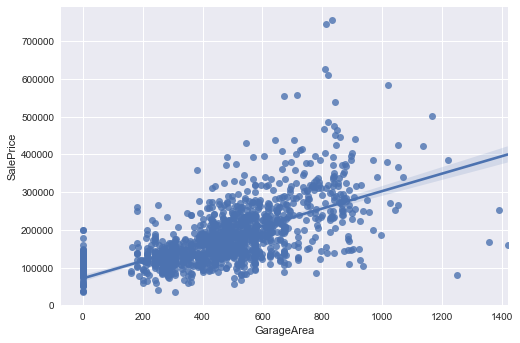

In [51]:
sns.regplot(x = num_df['GarageArea'], y = num_df['SalePrice'])

In [52]:
#analysing the features with linear relationship
num_feat = num_df[[ 'OverallQual', 'YearBuilt', 'YearRemodAdd','TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars' ,'GarageArea', 'SalePrice']]
num_feat.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [53]:
miss = num_feat.isnull()
for col in miss.columns.values.tolist():
    print( '*'*30)
    print(col)
    print(miss[col].value_counts())
    print('*'*30)

******************************
OverallQual
False    1460
Name: OverallQual, dtype: int64
******************************
******************************
YearBuilt
False    1460
Name: YearBuilt, dtype: int64
******************************
******************************
YearRemodAdd
False    1460
Name: YearRemodAdd, dtype: int64
******************************
******************************
TotalBsmtSF
False    1460
Name: TotalBsmtSF, dtype: int64
******************************
******************************
1stFlrSF
False    1460
Name: 1stFlrSF, dtype: int64
******************************
******************************
GrLivArea
False    1460
Name: GrLivArea, dtype: int64
******************************
******************************
FullBath
False    1460
Name: FullBath, dtype: int64
******************************
******************************
TotRmsAbvGrd
False    1460
Name: TotRmsAbvGrd, dtype: int64
******************************
******************************
GarageCars
False    1460


In [54]:
num_feat = num_feat.drop(columns = 'SalePrice')

In [55]:
num_feat

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460
1456,6,1978,1988,1542,2073,2073,2,7,2,500
1457,7,1941,2006,1152,1188,2340,2,9,1,252
1458,5,1950,1996,1078,1078,1078,1,5,1,240


Test train Split


In [56]:
train_x, test_x, train_y, test_y = train_test_split(num_feat, targ, test_size=.25, random_state=5)

In [60]:
lin = LinearRegression()

In [64]:
scale = StandardScaler()
for i in range(2, 8):
    print(f"for polynomial of {i}degrees")
    pipe = Pipeline([
        ('scale', scale),
        ('poly', PolynomialFeatures(degree=i)),
        ('model', lin)
    ])

    pipe.fit(train_x, np.array(train_y).reshape(-1, 1))
    print(pipe.score(test_x, np.array(test_y).reshape(-1, 1)))
    print(mean_squared_error(test_y, pipe.predict(test_x)))
    print(mean_absolute_error(test_y, pipe.predict(test_x)))
    print('')

for polynomial of 2degrees
0.8672212790346061
821551330.5897822
20337.134148801128

for polynomial of 3degrees
0.7694930500606705
1426232231.007895
24675.407349129684

for polynomial of 4degrees
-20788.021011930756
128629404996769.14
2305527.140775593

for polynomial of 5degrees
-365987.59361880686
2264507549719353.5
11538958.48639636

for polynomial of 6degrees
-263976.5694327236
1633327402436975.2
8250688.464837628

for polynomial of 7degrees
-870038.9751535797
5383260917538272.0
12862834.442584421

